<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/Condominium_Market_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Group Project**

This project uses the Pandas library in Python to predict the market value of a condominium unit, which is a key figure for landlords to understand their condominium's financial potential.


The main problem being addressed is how to accurately predict the market value of a condominium using past data and other financial parameters.


The goal of the project is to build a simple yet effective model that can use historical data as well as specific information about a condominium to estimate its market value. This will help landlords make better property investment decisions by providing them with reliable financial forecasts.

## 2.0 DATA COLLECTION/ACQUISITION/MINING

Source: https://catalog.data.gov/dataset/dof-condominium-comparable-rental-income-in-nyc

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#load dataset
df = pd.read_csv('/content/drive/MyDrive/DOF_Condominium_Comparable_Rental_Income_in_NYC.csv')

df.head()

Mounted at /content/drive


,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,0.35,2019
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,0.63,2019
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,0.22,2019
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,0.19,2019
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,0.22,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31575 entries, 0 to 31574
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Boro-Block-Lot                  31575 non-null  object 
 1   Condo Section                   31575 non-null  object 
 2   Address                         31575 non-null  object 
 3   Neighborhood                    31573 non-null  object 
 4   Building Classification         31575 non-null  object 
 5   Total Units                     31575 non-null  int64  
 6   Year Built                      31500 non-null  float64
 7   Gross SqFt                      31575 non-null  int64  
 8   Estimated Gross Income          31575 non-null  int64  
 9   Gross Income per SqFt           31575 non-null  float64
 10  Estimated Expense               31574 non-null  float64
 11  Expense per SqFt                31574 non-null  float64
 12  Net Operating Income            

In [ ]:
df.describe()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
count,31575.000000,31500.000000,3.157500e+04,3.157500e+04,31575.000000,3.157400e+04,31574.000000,3.157500e+04,3.157300e+04,31572.000000,...,2.544000e+04,2.544000e+04,25440.000000,2.543800e+04,25438.000000,2.543700e+04,2.544000e+04,25440.000000,25417.000000,31575.000000
mean,68.227300,1972.075492,7.817675e+04,2.788827e+06,31.895558,9.238130e+05,10.806676,1.865043e+06,1.463137e+07,165.582269,...,6.437566e+04,2.258966e+06,32.146593,7.585731e+05,10.918957,1.500532e+06,1.088059e+07,152.404349,0.831102,2017.298559
std,211.840948,77.141813,1.447472e+05,4.997051e+06,12.510339,1.674952e+06,3.776929,3.437238e+06,2.705954e+07,82.329966,...,9.505195e+04,4.041894e+06,12.765924,1.305259e+06,3.921392,2.823109e+06,2.071942e+07,89.462985,4.653018,3.367075
min,1.000000,0.000000,1.000000e+00,3.400000e+01,8.860000,1.200000e+01,0.160000,2.200000e+01,3.100000e+01,0.050000,...,2.630000e+03,1.825100e+04,0.580000,-1.069900e+04,-0.340000,1.772700e+04,1.300000e+05,14.100000,0.000000,2012.000000
25%,15.000000,1930.000000,1.806300e+04,4.645455e+05,21.330000,1.639360e+05,8.070000,2.916600e+05,2.234000e+06,98.790000,...,1.806975e+04,5.084258e+05,21.610000,1.733755e+05,8.090000,3.216110e+05,2.096000e+06,77.710000,0.210000,2014.000000
50%,30.000000,1992.000000,3.623600e+04,1.020529e+06,29.600000,3.625870e+05,10.280000,6.424900e+05,4.946000e+06,152.960000,...,3.500000e+04,1.009132e+06,29.720000,3.473265e+05,10.340000,6.306000e+05,4.212500e+06,131.930000,0.430000,2017.000000
75%,71.000000,2007.000000,8.540400e+04,2.751911e+06,41.280000,9.482475e+05,13.070000,1.795626e+06,1.403399e+07,223.732500,...,6.810800e+04,2.086875e+06,41.650000,7.334290e+05,13.290000,1.369434e+06,9.393000e+06,216.550000,0.790000,2020.000000
max,20363.000000,2022.000000,3.801490e+06,7.321670e+07,106.560000,4.348905e+07,40.940000,5.149835e+07,4.002400e+08,1628.060000,...,1.970736e+06,1.143618e+08,113.420000,2.400356e+07,53.470000,9.079181e+07,4.112740e+08,711.920000,132.250000,2023.000000


## 3.0 DATA PREPROCESSING

### 3.1 Data Cleaning

In [ ]:
df.isna().sum()

Boro-Block-Lot                       0
Condo Section                        0
Address                              0
Neighborhood                         2
Building Classification              0
                                  ... 
Net Operating Income 3            6138
Full Market Value 3               6135
Market Value per SqFt 3           6135
Distance from Condo in miles 2    6158
Report Year                          0
Length: 61, dtype: int64

#### 3.1.1 Handle incomplete data / missing value

To check the total number of missing values in each column:

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Print columns with missing values and the number of missing values
print(missing_columns)

Neighborhood                         2
Year Built                          75
Estimated Expense                    1
Expense per SqFt                     1
Full Market Value                    2
Market Value per SqFt                3
Boro-Block-Lot 1                     2
Address 1                            2
Neighborhood 1                       2
Building Classification 1            2
Total Units 1                        2
Year Built 1                         3
Gross SqFt 1                         2
Estimated Gross Income 1             3
Gross Income per SqFt 1              2
Estimated Expense 1                  5
Expense per SqFt 1                   4
Net Operating Income 1               5
Full Market Value 1                  2
Market Value per SqFt 1              2
Distance from Condo in miles        42
Boro-Block-Lot 2                   301
Address 2                          301
Neighborhood 2                     301
Building Classification 2          301
Total Units 2            

Comments:
1. We have 31575 entries in our dataset.
2. The highest number of missing values in one column is 6158.
3. Since we have enough data entries, we have decided to drop all the data entries even with only one missing values in a column.

In [ ]:
# Count the number of missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)

# Count the number of rows with more than 0 missing values
rows_with_missing_values = (missing_values_per_row > 0).sum()

print("Number of data entries with more than 0 missing values in their columns:", rows_with_missing_values)

Number of data entries with more than 0 missing values in their columns: 6240


Comments:
1. After confirming, we have 6240 data entires with more than 0 missing values in their columns.
2. 31575 - 6240 = 25335 data entries left if we perform dropping of all these data entires.
3. In our opinion, the data entries are sufficient for us for our further explorations.

In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25335 entries, 0 to 31574
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Boro-Block-Lot                  25335 non-null  object 
 1   Condo Section                   25335 non-null  object 
 2   Address                         25335 non-null  object 
 3   Neighborhood                    25335 non-null  object 
 4   Building Classification         25335 non-null  object 
 5   Total Units                     25335 non-null  int64  
 6   Year Built                      25335 non-null  float64
 7   Gross SqFt                      25335 non-null  int64  
 8   Estimated Gross Income          25335 non-null  int64  
 9   Gross Income per SqFt           25335 non-null  float64
 10  Estimated Expense               25335 non-null  float64
 11  Expense per SqFt                25335 non-null  float64
 12  Net Operating Income            25335

Comments:
1. After dropping all the data entries with missing value, there are 25335 samples left.

#### 3.1.3 Drop unrelated columns & columns with unclear functions

There are too many columns in our dataset. This makes us difficult to perform further analysis on our dataset.

Therefore, we decided to further clean up our dataset by dropping unrelated columns and columns with unclear functions to ease our further explorationn of dataset.                     

First and foremost,

We decided to drop those columns that contain the condominium information such as:
- `Condo-Section`
- `Boro-Block-Lot`
- `Address`
- `Building Classification`
- `Year Built`
- `Distance from Condo in miles`

In [ ]:
# List of columns to drop
columns_to_drop = [
    'Condo Section',
    'Boro-Block-Lot', 'Address', 'Building Classification',
    'Boro-Block-Lot 1', 'Boro-Block-Lot 2', 'Boro-Block-Lot 3',
    'Address 1', 'Address 2', 'Address 3',
    'Building Classification 1', 'Building Classification 2', 'Building Classification 3',
    'Year Built', 'Year Built 1', 'Year Built 2', 'Year Built 3',
    'Distance from Condo in miles', 'Distance from Condo in miles 1', 'Distance from Condo in miles 2'
    ]

# Drop the specified columns
df_cleaned_unrelated = df.drop(columns_to_drop, axis=1)

In [ ]:
df_cleaned_unrelated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25335 entries, 0 to 31574
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Neighborhood              25335 non-null  object 
 1   Total Units               25335 non-null  int64  
 2   Gross SqFt                25335 non-null  int64  
 3   Estimated Gross Income    25335 non-null  int64  
 4   Gross Income per SqFt     25335 non-null  float64
 5   Estimated Expense         25335 non-null  float64
 6   Expense per SqFt          25335 non-null  float64
 7   Net Operating Income      25335 non-null  int64  
 8   Full Market Value         25335 non-null  float64
 9   Market Value per SqFt     25335 non-null  float64
 10  Neighborhood 1            25335 non-null  object 
 11  Total Units 1             25335 non-null  float64
 12  Gross SqFt 1              25335 non-null  float64
 13  Estimated Gross Income 1  25335 non-null  float64
 14  Gross Incom

Comments:

1. After dropping those unrelated columns, we have 41 columns left.

#### 3.1.4 Drop redundant columns

After analyzing those columns left, we found that there are some redundant columns with totally same data entires.

Hence, we decided to keep only the initial occurrence of redundant columns while discarding all subsequent columns with same data values.

The column is:
- `Neighbourhood`

In [ ]:
# List of columns to drop
columns_to_drop = ['Neighborhood', 'Neighborhood 1', 'Neighborhood 2', 'Neighborhood 3']

# Drop the specified columns
df_cleaned_redundant = df_cleaned_unrelated.drop(columns_to_drop, axis=1)

In [ ]:
df_cleaned_redundant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25335 entries, 0 to 31574
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Units               25335 non-null  int64  
 1   Gross SqFt                25335 non-null  int64  
 2   Estimated Gross Income    25335 non-null  int64  
 3   Gross Income per SqFt     25335 non-null  float64
 4   Estimated Expense         25335 non-null  float64
 5   Expense per SqFt          25335 non-null  float64
 6   Net Operating Income      25335 non-null  int64  
 7   Full Market Value         25335 non-null  float64
 8   Market Value per SqFt     25335 non-null  float64
 9   Total Units 1             25335 non-null  float64
 10  Gross SqFt 1              25335 non-null  float64
 11  Estimated Gross Income 1  25335 non-null  float64
 12  Gross Income per SqFt 1   25335 non-null  float64
 13  Estimated Expense 1       25335 non-null  float64
 14  Expense per

Comments:
1. There are 37 columns left.

#### 3.1.4 Handle duplicate entries

To determine whether there are duplicated data entries in the dataset:

In [ ]:
# First, we check for duplicated rows across all columns
duplicated_rows = df_cleaned_redundant[df_cleaned_redundant.duplicated(keep=False)]

# Display the duplicated rows
print(duplicated_rows)

       Total Units  Gross SqFt  Estimated Gross Income  Gross Income per SqFt  \
1368            16       24331                  575671                  23.66   
1369            16       24331                  575671                  23.66   
3917            14       16637                  404279                  24.30   
3918            14       16637                  404279                  24.30   
3945            16       24787                  480868                  19.40   
...            ...         ...                     ...                    ...   
31564           31       35212                  617618                  17.54   
31566           37       47880                  839815                  17.54   
31567           37       47880                  839815                  17.54   
31568           37       47880                  839815                  17.54   
31569           37       47880                  839815                  17.54   

       Estimated Expense  E

In [ ]:
# Count the number of duplicated rows across all columns
total_duplicated_rows = df_cleaned_redundant.duplicated(keep=False).sum()

# Print the total number of duplicated rows
print(f"Total number of duplicated rows: {total_duplicated_rows}")

Total number of duplicated rows: 67


Comments:

1. There are a total of 69 duplicated data entries with exact same data for all columns in our dataset.
2. We decided to remove all the duplicated entries meanwhile retaining the first occurence of the duplicated data entries

To delete all other duplicated rows while retaining the first occurrence of the duplicated rows:

In [ ]:
# Remove all other duplicated rows, keeping the first occurrence
df_cleaned_deduplicated = df_cleaned_redundant.drop_duplicates(keep='first')

df_cleaned_deduplicated.head(5)

,Total Units,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Total Units 1,...,Total Units 3,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Report Year
0,70,82017,4452703,54.29,1729739.0,21.09,2722964,22115002.0,269.64,27.0,...,35.0,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,2019
1,183,141738,7113830,50.19,2361355.0,16.66,4752475,38596999.0,272.31,48.0,...,48.0,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,2019
2,109,158571,7329152,46.22,2854278.0,18.00,4474874,36343010.0,229.19,102.0,...,19.0,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,2019
3,20,53943,2132906,39.54,666196.0,12.35,1466710,11912000.0,220.83,53.0,...,49.0,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,2019
4,113,88230,4288860,48.61,1055231.0,11.96,3233629,26261996.0,297.65,11.0,...,39.0,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,2019


In [ ]:
df_cleaned_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25297 entries, 0 to 31574
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Units               25297 non-null  int64  
 1   Gross SqFt                25297 non-null  int64  
 2   Estimated Gross Income    25297 non-null  int64  
 3   Gross Income per SqFt     25297 non-null  float64
 4   Estimated Expense         25297 non-null  float64
 5   Expense per SqFt          25297 non-null  float64
 6   Net Operating Income      25297 non-null  int64  
 7   Full Market Value         25297 non-null  float64
 8   Market Value per SqFt     25297 non-null  float64
 9   Total Units 1             25297 non-null  float64
 10  Gross SqFt 1              25297 non-null  float64
 11  Estimated Gross Income 1  25297 non-null  float64
 12  Gross Income per SqFt 1   25297 non-null  float64
 13  Estimated Expense 1       25297 non-null  float64
 14  Expense per

Comments:
1. After dropping all those duplicate entries, we have reduced the number of data entries from 25335 to now 25297 left.

#### 3.1.6 Check for inconsistent data

In [ ]:
# Set display options to show all rows and columns without abbreviation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print out each column and their number of unique items
print('--Columns and their number of unique items--')
print(df_cleaned_deduplicated.nunique())

--Columns and their number of unique items--
Total Units                   443
Gross SqFt                   4794
Estimated Gross Income      25016
Gross Income per SqFt        4906
Estimated Expense           24773
Expense per SqFt             1974
Net Operating Income        24945
Full Market Value           21183
Market Value per SqFt       16376
Total Units 1                 412
Gross SqFt 1                 4764
Estimated Gross Income 1    21883
Gross Income per SqFt 1      4958
Estimated Expense 1         21561
Expense per SqFt 1           1987
Net Operating Income 1      21873
Full Market Value 1          7815
Market Value per SqFt 1      9632
Total Units 2                 411
Gross SqFt 2                 5130
Estimated Gross Income 2    22257
Gross Income per SqFt 2      4999
Estimated Expense 2         21935
Expense per SqFt 2           1973
Net Operating Income 2      22230
Full Market Value 2          8238
Market Value per SqFt 2     10366
Total Units 3                 411
Gro

Comments:
1. From the output, there are no glaring inconsistencies observed, and the diversity of values within each column appears reasonable.
2. Further exploration may be required to identify any subtle data quality issues or anomalies.


#### 3.1.6 Check for outliers and determine whether to drop those outliers or not

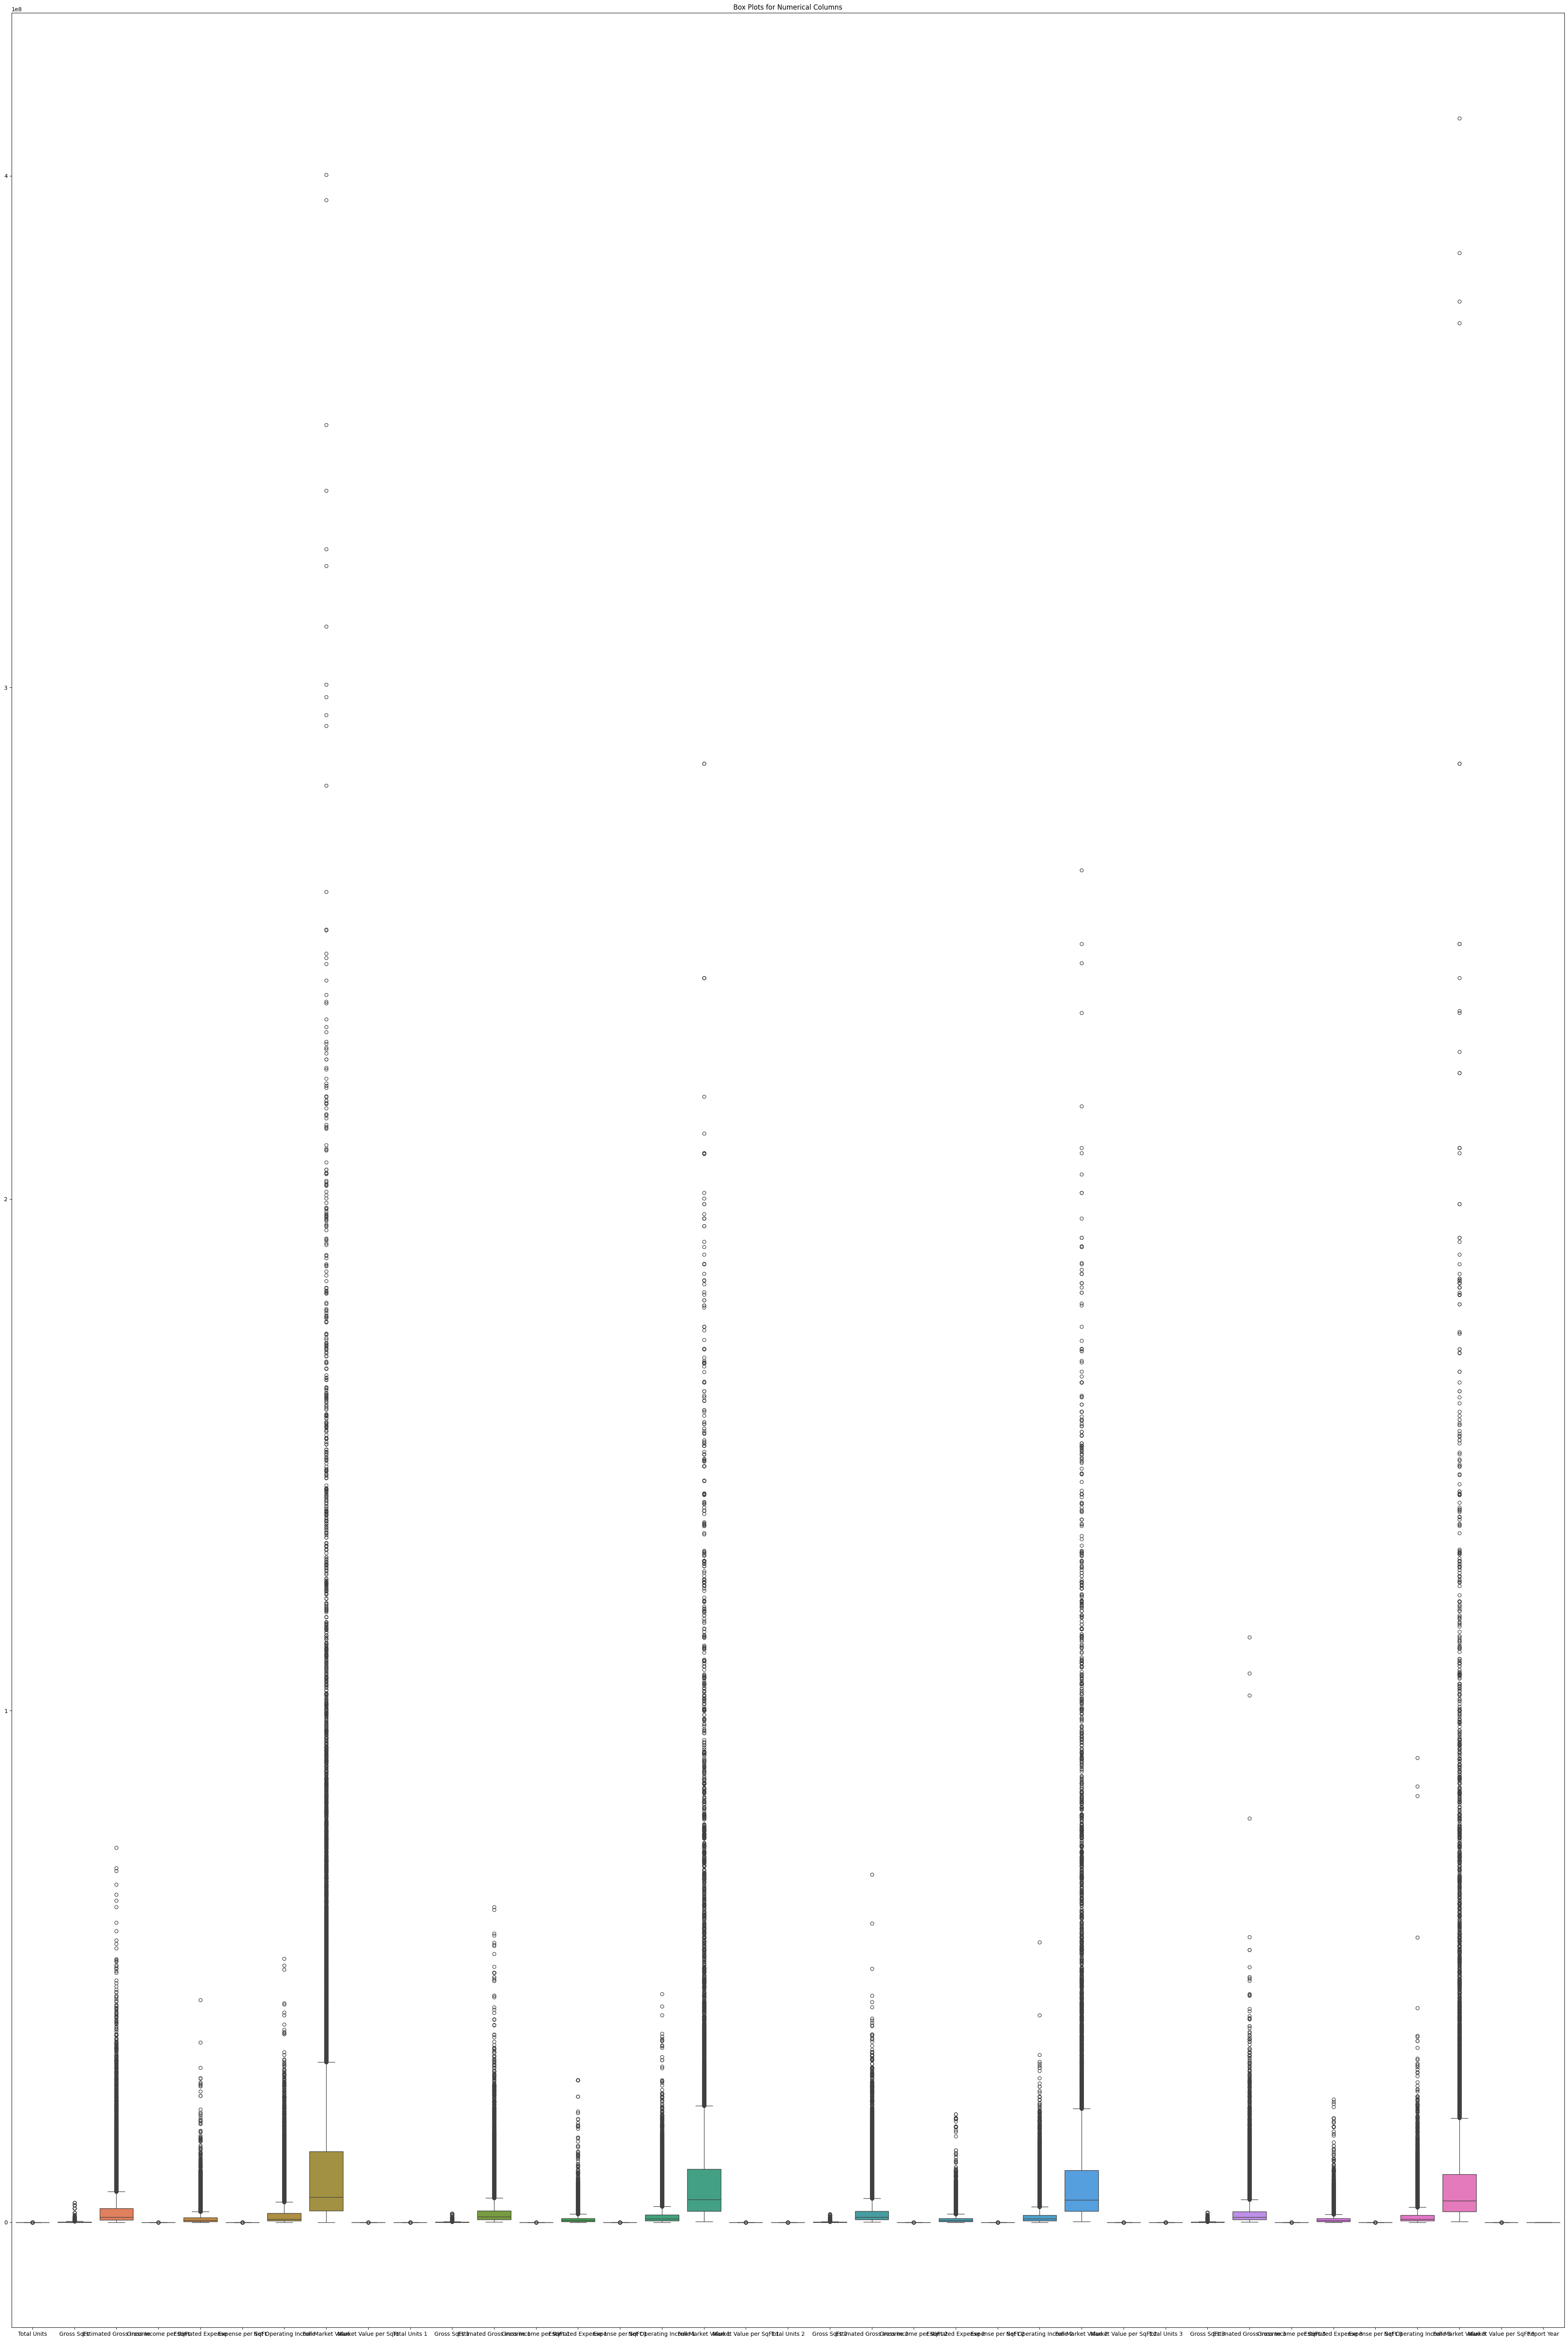

In [ ]:
# Select only numerical columns
numerical_df = df_cleaned_deduplicated.select_dtypes(include=['float64', 'int64'])

# To set the size of the plot
plt.figure(figsize=(50, 75))

# To create box plots for all numerical columns
sns.boxplot(data=numerical_df)

# TO set the title and then to show the boxplot
plt.title("Box Plots for Numerical Columns")
plt.show()

Comments:
1. The presennce of outliers seem to be reasonable and will not affect much on our dataset since out dataset has large amount of data entries.
2. Therefore, outliers have not been removed from the dataset because they represent real variability in the data. While they can distort some visualizations, they provide critical insights into the nature of the data, capturing rare but significant events.


### 3.2 Data Transformation

#### 3.2.1 Data Reduction

We found that there are rebundant columns with similarities. Therefore, we need to decide what columns to be further dropped or transformed.

To further reduce the data amount, we decide to combine those redundant columns and form new columns for them respectively using the mean obtained from data in those redundant columns

In [ ]:
df_cleaned_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25297 entries, 0 to 31574
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Units               25297 non-null  int64  
 1   Gross SqFt                25297 non-null  int64  
 2   Estimated Gross Income    25297 non-null  int64  
 3   Gross Income per SqFt     25297 non-null  float64
 4   Estimated Expense         25297 non-null  float64
 5   Expense per SqFt          25297 non-null  float64
 6   Net Operating Income      25297 non-null  int64  
 7   Full Market Value         25297 non-null  float64
 8   Market Value per SqFt     25297 non-null  float64
 9   Total Units 1             25297 non-null  float64
 10  Gross SqFt 1              25297 non-null  float64
 11  Estimated Gross Income 1  25297 non-null  float64
 12  Gross Income per SqFt 1   25297 non-null  float64
 13  Estimated Expense 1       25297 non-null  float64
 14  Expense per

In [ ]:
import pandas as pd
import numpy as np

df_cleaned_deduplicated.drop(columns=['Total Units 1', 'Total Units 2', 'Total Units 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Gross SqFt 1', 'Gross SqFt 2', 'Gross SqFt 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Estimated Gross Income 1', 'Estimated Gross Income 2', 'Estimated Gross Income 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Gross Income per SqFt 1', 'Gross Income per SqFt 2', 'Gross Income per SqFt 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Estimated Expense 1', 'Estimated Expense 2', 'Estimated Expense 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Expense per SqFt 1', 'Expense per SqFt 2', 'Expense per SqFt 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Net Operating Income 1', 'Net Operating Income 2', 'Net Operating Income 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Full Market Value 1', 'Full Market Value 2', 'Full Market Value 3'], inplace=True)
df_cleaned_deduplicated.drop(columns=['Market Value per SqFt 1', 'Market Value per SqFt 2', 'Market Value per SqFt 3'], inplace=True)

print(df_cleaned_deduplicated.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25297 entries, 0 to 31574
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Units             25297 non-null  int64  
 1   Gross SqFt              25297 non-null  int64  
 2   Estimated Gross Income  25297 non-null  int64  
 3   Gross Income per SqFt   25297 non-null  float64
 4   Estimated Expense       25297 non-null  float64
 5   Expense per SqFt        25297 non-null  float64
 6   Net Operating Income    25297 non-null  int64  
 7   Full Market Value       25297 non-null  float64
 8   Market Value per SqFt   25297 non-null  float64
 9   Report Year             25297 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 2.1 MB
None


<ipython-input-21-fbca33c95feb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_deduplicated.drop(columns=['Total Units 1', 'Total Units 2', 'Total Units 3'], inplace=True)
<ipython-input-21-fbca33c95feb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_deduplicated.drop(columns=['Gross SqFt 1', 'Gross SqFt 2', 'Gross SqFt 3'], inplace=True)
<ipython-input-21-fbca33c95feb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Comments:
1. Since we have large enough data entries, even if there are data in redundant columns, we decided to drop all those redundant columns to ease our further data analysis.

Derive new features from original features in the dataset

In [ ]:
df_cleaned_deduplicated['Units_x_GrossSqFt'] = df_cleaned_deduplicated['Total Units'] * df_cleaned_deduplicated['Gross SqFt']
df_cleaned_deduplicated['Income_per_Unit'] = df_cleaned_deduplicated['Estimated Gross Income'] / df_cleaned_deduplicated['Total Units']
df_cleaned_deduplicated['Expense_per_Unit'] = df_cleaned_deduplicated['Estimated Expense'] / df_cleaned_deduplicated['Total Units']
df_cleaned_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25297 entries, 0 to 31574
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Units             25297 non-null  int64  
 1   Gross SqFt              25297 non-null  int64  
 2   Estimated Gross Income  25297 non-null  int64  
 3   Gross Income per SqFt   25297 non-null  float64
 4   Estimated Expense       25297 non-null  float64
 5   Expense per SqFt        25297 non-null  float64
 6   Net Operating Income    25297 non-null  int64  
 7   Full Market Value       25297 non-null  float64
 8   Market Value per SqFt   25297 non-null  float64
 9   Report Year             25297 non-null  int64  
 10  Units_x_GrossSqFt       25297 non-null  int64  
 11  Income_per_Unit         25297 non-null  float64
 12  Expense_per_Unit        25297 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.7 MB


<ipython-input-22-ec7f68267e1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_deduplicated['Units_x_GrossSqFt'] = df_cleaned_deduplicated['Total Units'] * df_cleaned_deduplicated['Gross SqFt']
<ipython-input-22-ec7f68267e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_deduplicated['Income_per_Unit'] = df_cleaned_deduplicated['Estimated Gross Income'] / df_cleaned_deduplicated['Total Units']
<ipython-input-22-ec7f68267e1f>:3: SettingWithCopyWarning: 
A value is trying to be set 

Comments:
1. We have derived 3 new features from the original features we have in the dataset to enhance our dataset performance in the following analysis.
2. Those derived features are:

- `Units_x_GrossSqFt`

- `Income_per_Unit`

- `Expense_per_Unit`

Since there is a time series data `Report Year`, we decided to arrange all the data entries according to the years to ease our further data exploration.

In [ ]:
# Sort the DataFrame by "Report Year" in descending order
df_cleaned_deduplicated2 = df_cleaned_deduplicated.sort_values(by='Report Year', ascending=False).reset_index(drop=True)

In [ ]:
df_cleaned_deduplicated2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Units             25297 non-null  int64  
 1   Gross SqFt              25297 non-null  int64  
 2   Estimated Gross Income  25297 non-null  int64  
 3   Gross Income per SqFt   25297 non-null  float64
 4   Estimated Expense       25297 non-null  float64
 5   Expense per SqFt        25297 non-null  float64
 6   Net Operating Income    25297 non-null  int64  
 7   Full Market Value       25297 non-null  float64
 8   Market Value per SqFt   25297 non-null  float64
 9   Report Year             25297 non-null  int64  
 10  Units_x_GrossSqFt       25297 non-null  int64  
 11  Income_per_Unit         25297 non-null  float64
 12  Expense_per_Unit        25297 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.5 MB


In [ ]:
df_cleaned_deduplicated2.head(5)

,Total Units,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year,Units_x_GrossSqFt,Income_per_Unit,Expense_per_Unit
0,165,124516,2584952,20.76,1297457.0,10.42,1287495,9950000.0,79.91,2023,20545140,15666.375758,7863.375758
1,72,235713,18081544,76.71,8136813.0,34.52,9944731,77816000.0,330.13,2023,16971336,251132.555556,113011.291667
2,48,68556,3326337,48.52,1019428.0,14.87,2306909,18574000.0,270.93,2023,3290688,69298.687500,21238.083333
3,221,220209,11276903,51.21,3833839.0,17.41,7443064,59829000.0,271.69,2023,48666189,51026.710407,17347.687783
4,14,8345,464900,55.71,133770.0,16.03,331130,2651000.0,317.68,2023,116830,33207.142857,9555.000000


Comments:
1. These dataframe `df_cleaned_deduplicated2` is reserved for the purpose of viewing the relationship between `Report Year` and other features only.
2. Therefore, this dataframe `df_cleaned_deduplicated2` is not normalized in the following step.

#### 3.2.2 Data normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only numerical columns
numerical_columns = df_cleaned_deduplicated2.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler on the numerical columns and transform them
df_cleaned_deduplicated[numerical_columns] = scaler.fit_transform(df_cleaned_deduplicated[numerical_columns])

df_cleaned_deduplicated.head()


<ipython-input-26-f47cd6ff281f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_deduplicated[numerical_columns] = scaler.fit_transform(df_cleaned_deduplicated[numerical_columns])


,Total Units,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year,Units_x_GrossSqFt,Income_per_Unit,Expense_per_Unit
0,0.023254,0.048167,0.351865,1.764173,0.508242,2.674830,0.264143,0.288607,1.230474,0.477786,-0.052662,0.014785,0.042323
1,0.643031,0.480945,0.895598,1.435733,0.895253,1.512008,0.864715,0.906014,1.262877,0.477786,0.012137,-0.024760,-0.027755
2,0.237160,0.602927,0.939593,1.117706,1.197282,1.863742,0.782567,0.821581,0.739589,0.477786,-0.015628,0.020588,0.051080
3,-0.250983,-0.155275,-0.122126,0.582588,-0.143423,0.380685,-0.107607,-0.093592,0.638135,0.477786,-0.067620,0.083585,0.093361
4,0.259099,0.093191,0.318388,1.309163,0.094951,0.278315,0.415259,0.443951,1.570393,0.477786,-0.039094,-0.026229,-0.048916


Comments:

StandardScaler is chosen over MinMaxScaler because it centers the data around the mean with a unit standard deviation, which is beneficial if the data follows a Gaussian distribution or if we are using machine learning algorithms that assume the data is centered around zero

### 3.3 Data Visualisation

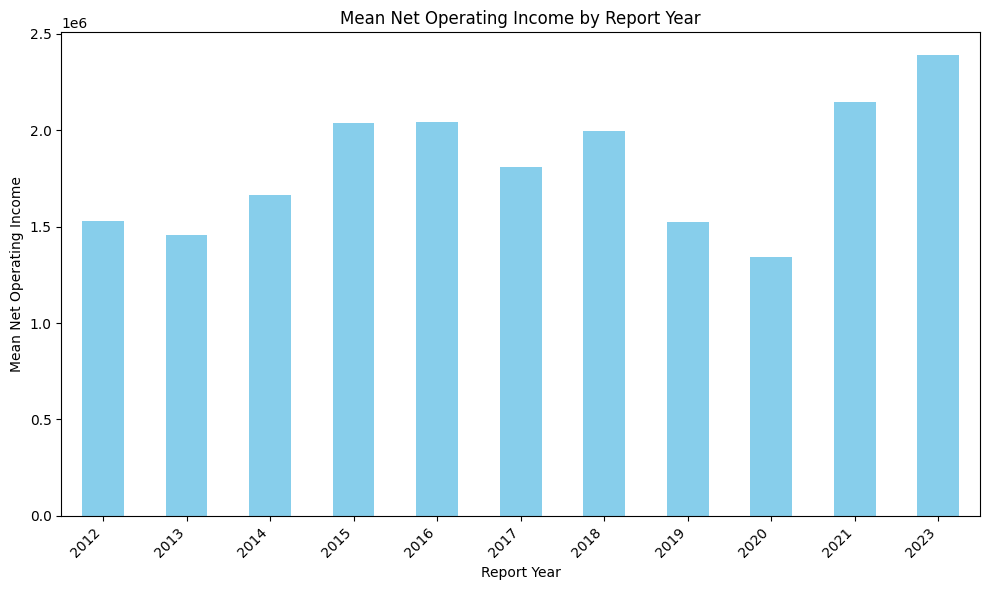

In [ ]:
# Grouping by report year and calculating the mean net operating income
mean_net_income_by_year = df_cleaned_deduplicated2.groupby('Report Year')['Net Operating Income'].mean()

# Plotting the mean net operating income by report year
plt.figure(figsize=(10, 6))
mean_net_income_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Report Year')
plt.ylabel('Mean Net Operating Income')
plt.title('Mean Net Operating Income by Report Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

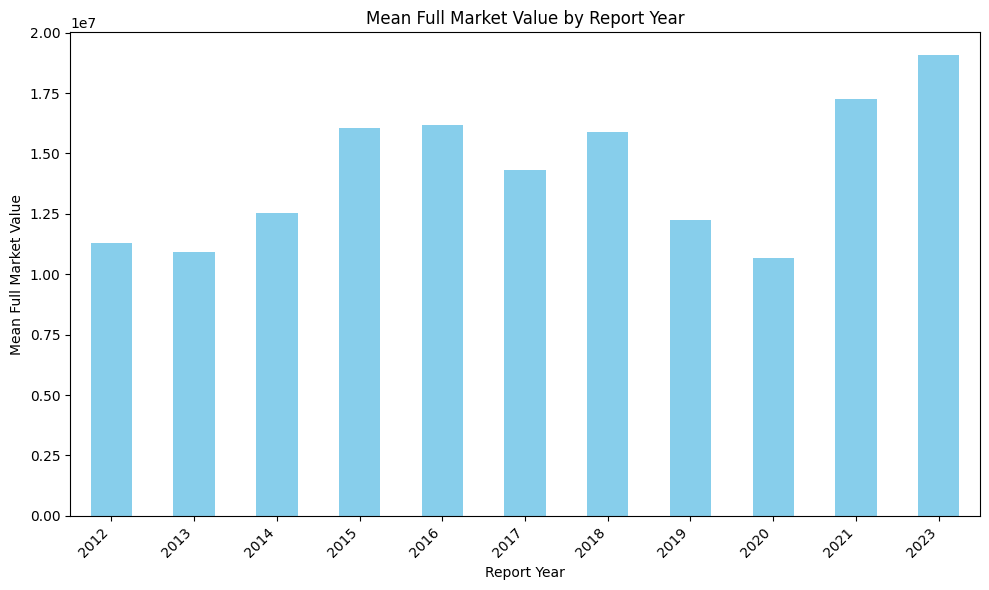

In [ ]:
# Grouping by report year and calculating the mean full market value
mean_market_value_by_year = df_cleaned_deduplicated2.groupby('Report Year')['Full Market Value'].mean()

# Plotting the mean full market value by report year
plt.figure(figsize=(10, 6))
mean_market_value_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Report Year')
plt.ylabel('Mean Full Market Value')
plt.title('Mean Full Market Value by Report Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

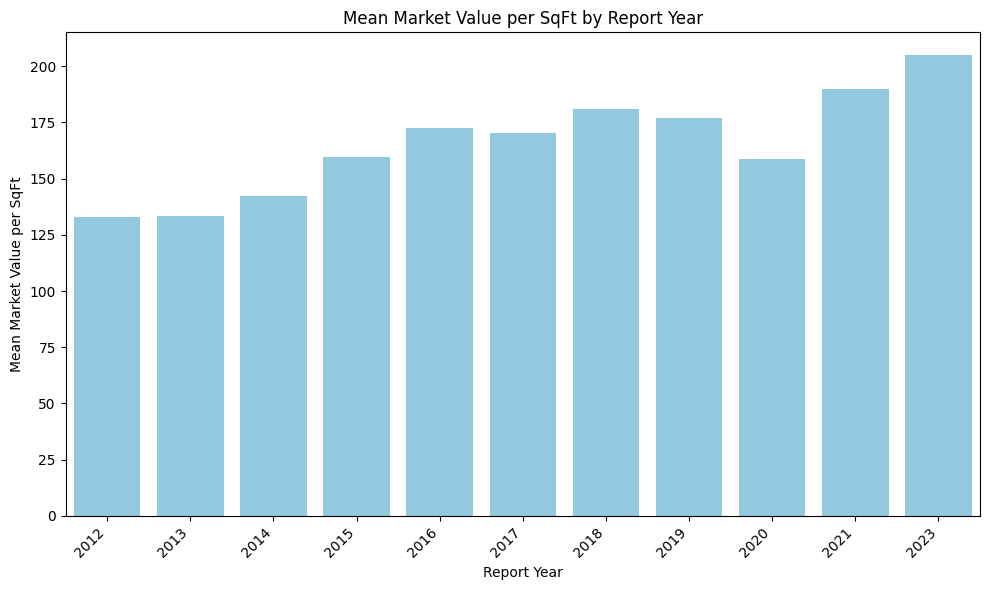

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by report year and calculating the mean market value per square foot
mean_market_value_per_sqft_by_year = df_cleaned_deduplicated2.groupby('Report Year')['Market Value per SqFt'].mean().reset_index()

# Plotting the mean market value per square foot by report year
plt.figure(figsize=(10, 6))
sns.barplot(x='Report Year', y='Market Value per SqFt', data=mean_market_value_per_sqft_by_year, color='skyblue')
plt.xlabel('Report Year')
plt.ylabel('Mean Market Value per SqFt')
plt.title('Mean Market Value per SqFt by Report Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

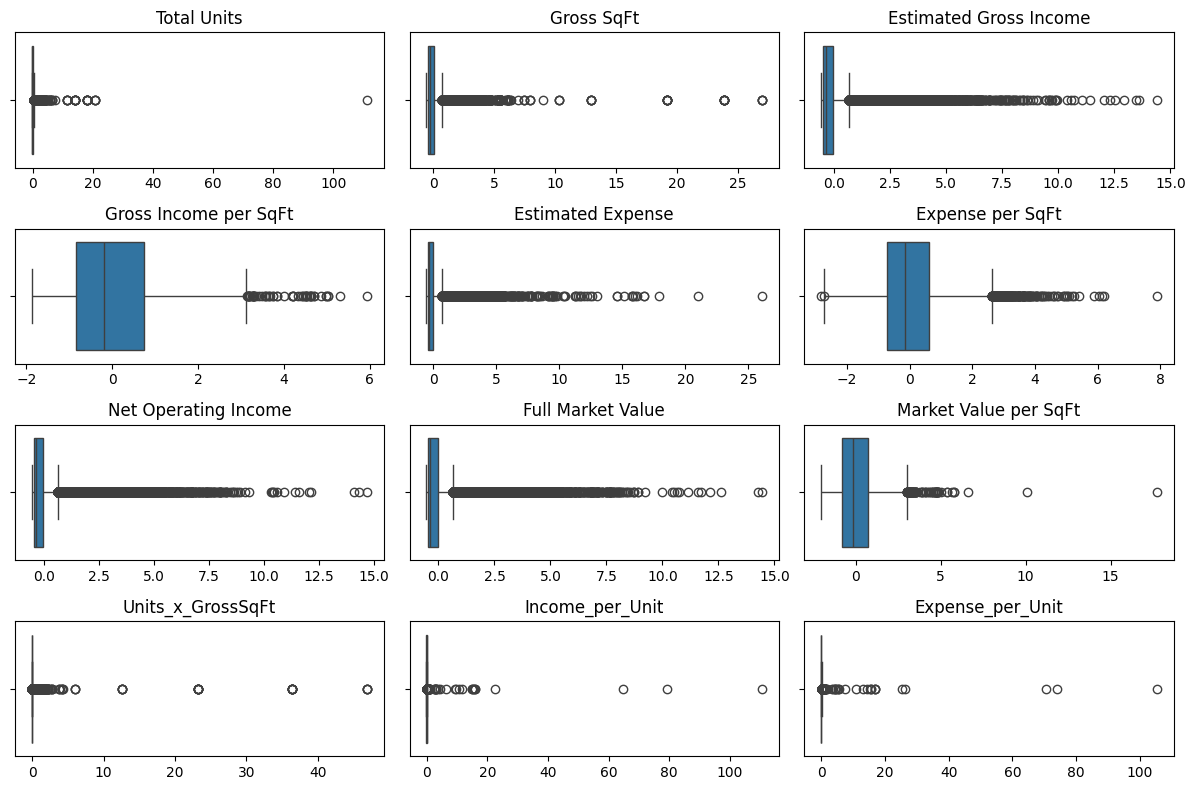

In [ ]:
# Check outliers for dataframe
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical columns
numerical_columns = ['Total Units', 'Gross SqFt', 'Estimated Gross Income',
                     'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt',
                     'Net Operating Income', 'Full Market Value', 'Market Value per SqFt',
                     'Units_x_GrossSqFt', 'Income_per_Unit', 'Expense_per_Unit']

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_cleaned_deduplicated[column])
    plt.title(column)
    plt.xlabel('')  # Remove x-axis label for better readability

plt.tight_layout()
plt.show()

## 4.0 FEATURE SELECTION/FEATURE EXTRACTION

### 4.1 Determine target variable and features

For the data we acquire, we aim to predict the estimated gross income from rental of properties with different attributes and features.

Therefore, the column `Estimated Gross Income_mean` will be our target variable and in following step we will explore those features.

In [ ]:
df_cleaned_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25297 entries, 0 to 31574
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Units             25297 non-null  float64
 1   Gross SqFt              25297 non-null  float64
 2   Estimated Gross Income  25297 non-null  float64
 3   Gross Income per SqFt   25297 non-null  float64
 4   Estimated Expense       25297 non-null  float64
 5   Expense per SqFt        25297 non-null  float64
 6   Net Operating Income    25297 non-null  float64
 7   Full Market Value       25297 non-null  float64
 8   Market Value per SqFt   25297 non-null  float64
 9   Report Year             25297 non-null  float64
 10  Units_x_GrossSqFt       25297 non-null  float64
 11  Income_per_Unit         25297 non-null  float64
 12  Expense_per_Unit        25297 non-null  float64
dtypes: float64(13)
memory usage: 2.7 MB


In [ ]:
# Define the feature columns and the target column
feature_columns = ['Total Units', 'Gross SqFt', 'Estimated Gross Income',
                  'Gross Income per SqFt','Estimated Expense', 'Expense per SqFt',
                  'Net Operating Income','Income_per_Unit', 'Market Value per SqFt',
                  'Units_x_GrossSqFt','Expense_per_Unit']
target_column = 'Full Market Value'

# Extract features and target from the DataFrame
X = df_cleaned_deduplicated[feature_columns]
y = df_cleaned_deduplicated[target_column]

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to display the importance of each feature
feature_importance_mi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mi
}).sort_values(by='Importance', ascending=False)

print(feature_importance_mi)

                   Feature  Importance
6     Net Operating Income    3.999277
2   Estimated Gross Income    2.082768
4        Estimated Expense    1.102597
1               Gross SqFt    1.082465
9        Units_x_GrossSqFt    0.827373
0              Total Units    0.691887
8    Market Value per SqFt    0.297705
7          Income_per_Unit    0.273033
3    Gross Income per SqFt    0.259220
10        Expense_per_Unit    0.149929
5         Expense per SqFt    0.135637


Why Net Operating Income?

Net Operating Income (NOI) is a crucial measure in real estate investments, representing the profitability of a property before financing and taxes. It is used to assess the property's income-generating ability.
Predicting NOI can help investors make informed decisions about purchasing, selling, or managing properties.

### 4.2 Splitting dataset into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (20237, 11) (20237,)
Testing set shape: (5060, 11) (5060,)


Comments:
1. The training set consists of 20,237 samples, each with 11 features.
2. The target variable for the training set also contains 20,237 entries.
3. The testing set consists of 5,060 samples, each with 11 features.
4. The target variable for the testing set also contains 5,060 entries.

### 4.3 PCA

In [ ]:
# Step 3: PCA for Dimensionality Reduction
# Perform PCA, retaining enough components to explain a large amount of variance (e.g., 95%)
pca = PCA(n_components=0.95)

# Fit PCA on the scaled training data and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the scaled test data using the same PCA
X_test_pca = pca.transform(X_test)

# Verify the shapes of the resulting datasets
print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train_pca shape: (20237, 5)
X_test_pca shape: (5060, 5)
y_train shape: (20237,)
y_test shape: (5060,)


Comments:
1. The PCA-transformed training set `X_train_pca` has a shape of (20,237, 5), indicating 20,237 samples each with 5 principal components.
2. Similarly, the PCA-transformed testing set `X_test_pca` has a shape of (5,060, 5), indicating 5,060 samples each with 5 principal components.
3. The target variable for the training set `y_train` has 20,237 entries, while the target variable for the testing set `y_test` has 5,060 entries.

## 5.0 MODEL SELECTION

## 6.0 MODEL TRAINING AND HYPERPARAMETER TUNING

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.2 MB/s eta 0:00:00


###1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

lr_regressor = LinearRegression()
lr_regressor.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
lr_y_train_pred = lr_regressor.predict(X_train_pca)
lr_y_test_pred = lr_regressor.predict(X_test_pca)

lr_train_rmse = mean_squared_error(y_train, lr_y_train_pred, squared=False)
lr_test_rmse = mean_squared_error(y_test, lr_y_test_pred, squared=False)
print("Train RMSE:", lr_train_rmse)
print("Test RMSE:", lr_test_rmse)

lr_mae = mean_absolute_error(y_test, lr_y_test_pred)
lr_mse = mean_squared_error(y_test, lr_y_test_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_test_pred))
lr_r2 = explained_variance_score(y_test, lr_y_test_pred)

lr_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [lr_mae, lr_mse, lr_rmse, lr_r2]
})

print(lr_metrics)

Train RMSE: 0.14027437213409863
Test RMSE: 0.15773616077433197
      Metric     Value
0        MAE  0.071297
1        MSE  0.024881
2       RMSE  0.157736
3  R-Squared  0.975530


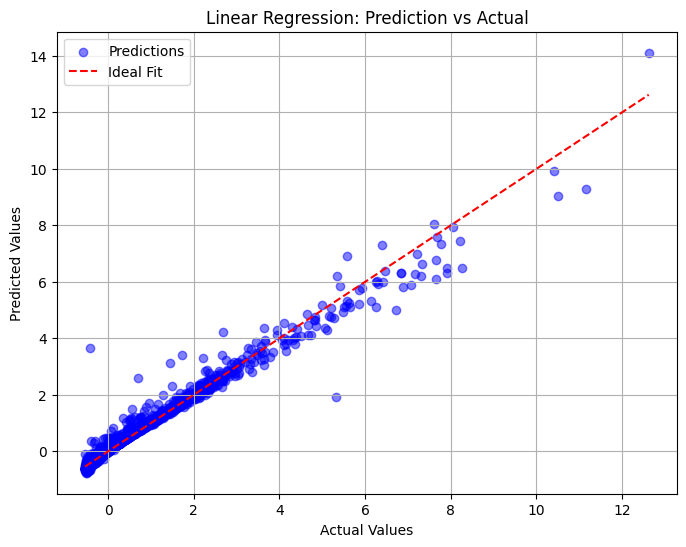

Overfitting Rate: 0.005


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_test_pred , color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('Linear Regression: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

lr_train_r2 = r2_score(y_train, lr_y_train_pred )
lr_test_r2 = r2_score(y_test, lr_y_test_pred )

lr_overfitting_rate = lr_train_r2 - lr_test_r2
print("Overfitting Rate:", round(lr_overfitting_rate, 3))

Comments:

Hyperparameter tuning is not needed for linear regression.

By comparing the R² scores from the training and test datasets, we derive an "overfitting rate".

- A positive overfitting rate (where the training R² is higher than the test R²) indicates the model might be **overfitting** the training data.

- Conversely, a negative rate suggests **underfitting** or potentially better generalization, depending on the context.

###2) SGD Regression

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np
import pandas as pd

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train_pca, y_train)

SGDRegressor()

####Without Hyperparameter tuning

In [ ]:
sgd_y_train_pred = sgd_regressor.predict(X_train_pca)
sgd_y_test_pred = sgd_regressor.predict(X_test_pca)

sgd_train_rmse = mean_squared_error(y_train, sgd_y_train_pred, squared=False)
sgd_test_rmse = mean_squared_error(y_test, sgd_y_test_pred, squared=False)
print("Train RMSE:", sgd_train_rmse)
print("Test RMSE:", sgd_test_rmse)

sgd_mae = mean_absolute_error(y_test, sgd_y_test_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_test_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_r2 = explained_variance_score(y_test, sgd_y_test_pred)

sgd_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [sgd_mae, sgd_mse, sgd_rmse, sgd_r2]
})

print(sgd_metrics)

Train RMSE: 1.3700037867432577
Test RMSE: 2.749742039870861
      Metric     Value
0        MAE  0.153923
1        MSE  7.561081
2       RMSE  2.749742
3  R-Squared -6.434075


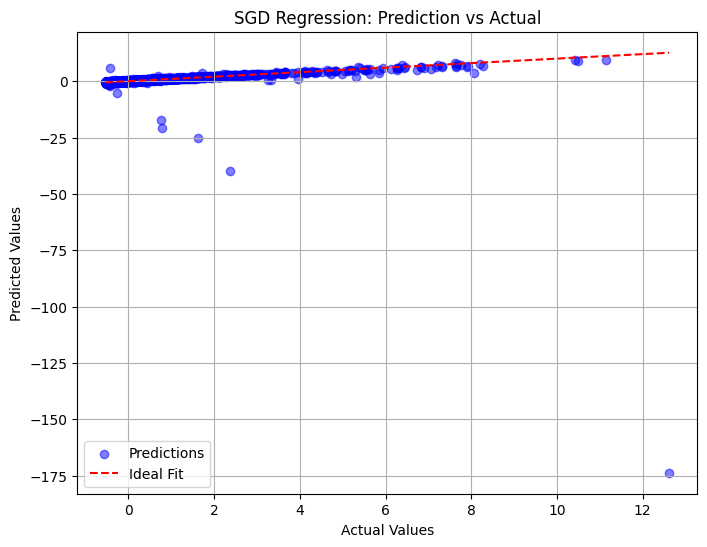

Overfitting Rate: 5.552


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('SGD Regression: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

sgd_train_r2 = r2_score(y_train, sgd_y_train_pred)
sgd_test_r2 = r2_score(y_test, sgd_y_test_pred)

sgd_overfitting_rate = sgd_train_r2 - sgd_test_r2
print("Overfitting Rate:", round(sgd_overfitting_rate, 3))


Comments:

The model is underfitting.

####With Hyperparameter tuning

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

sgd_regressor2 = SGDRegressor(max_iter=1000, tol=1e-3)

# Define a grid of hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1, 10],
    'penalty': ['l2'],
    'learning_rate': ['adaptive'],
    'eta0': [0.01, 0.1]
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=sgd_regressor2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and best score (negative MSE)
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 1, 'eta0': 0.01, 'learning_rate': 'adaptive', 'penalty': 'l2'}
Best score (negative MSE): -0.09213306843165073


In [ ]:
# Use the best estimator to make predictions
sgd_y_train_pred2 = grid_search.best_estimator_.predict(X_train_pca)
sgd_y_test_pred2 = grid_search.best_estimator_.predict(X_test_pca)

sgd_train_rmse2 = mean_squared_error(y_train, sgd_y_train_pred2, squared=False)
sgd_test_rmse2 = mean_squared_error(y_test, sgd_y_test_pred2, squared=False)
print("Train RMSE:", sgd_train_rmse2)
print("Test RMSE:", sgd_test_rmse2)

# Calculate performance metrics
sgd_mae2 = mean_absolute_error(y_test, sgd_y_test_pred2)
sgd_mse2 = mean_squared_error(y_test, sgd_y_test_pred2)
sgd_rmse2 = np.sqrt(mean_squared_error(y_test, sgd_y_test_pred2))
sgd_r22 = explained_variance_score(y_test, sgd_y_test_pred2)

# Performance Metrics for Test Set using SGDRegressor
sgd_metrics2 = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [sgd_mae2, sgd_mse2, sgd_rmse2, sgd_r22]
})

print(sgd_metrics2)

Train RMSE: 0.3026363838150038
Test RMSE: 0.3445455130435698
      Metric     Value
0        MAE  0.135368
1        MSE  0.118712
2       RMSE  0.344546
3  R-Squared  0.883297


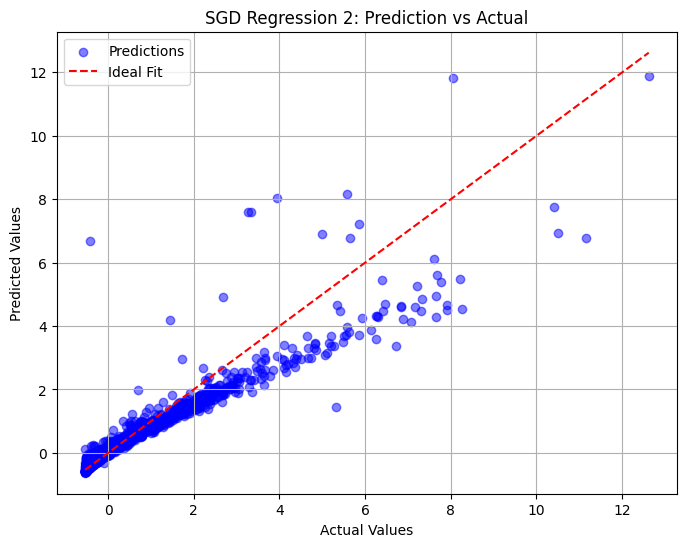

Overfitting Rate: 0.025


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_y_test_pred2, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('SGD Regression 2: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

sgd_train_r22 = r2_score(y_train, sgd_y_train_pred2)
sgd_test_r22 = r2_score(y_test, sgd_y_test_pred2)

sgd_overfitting_rate2 = sgd_train_r22 - sgd_test_r22
print("Overfitting Rate:", round(sgd_overfitting_rate2, 3))

Comments:
1. This scatter plot shows predicted vs. actual values for the SGD regression model.
2. The blue dots represent predictions, and the red dashed line represents the ideal fit.
3. Most points are close to the line, indicating good performance, but deviations at higher values suggest some prediction errors.

In [ ]:
data_xgd = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Before validation': [sgd_mae, sgd_mse, sgd_rmse, sgd_r2],
    'After validation': [sgd_mae2, sgd_mse2, sgd_rmse2, sgd_r22],
}

# Create the DataFrame
comparison_df = pd.DataFrame(data_xgd)

# Transpose the DataFrame
comparison_df = comparison_df.set_index('Metric').transpose()

# Style the DataFrame
styled_df = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)

# Display the styled DataFrame in a Jupyter Notebook
display(styled_df)

Metric,MAE,MSE,RMSE,R-Squared
Before validation,0.153923,7.561081,2.749742,-6.434075
After validation,0.135368,0.118712,0.344546,0.883297


###3) Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train_pca, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
rf_y_train_pred = rf_regressor.predict(X_train_pca)
rf_y_test_pred = rf_regressor.predict(X_test_pca)

# Calculate RMSE for training and test sets
rf_train_rmse = mean_squared_error(y_train, rf_y_train_pred, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_y_test_pred, squared=False)
print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse)

# Calculate the performance metrics
rf_mae = mean_absolute_error(y_test,rf_y_test_pred)
rf_mse = mean_squared_error(y_test,rf_y_test_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_test_pred))
rf_r2 = explained_variance_score(y_test, rf_y_test_pred)

# Performance Metrics
rf_metrics = pd.DataFrame({
    'Metric': ['MAE','MSE', 'RMSE', 'R-Squared'],
    'Value': [ rf_mae, rf_mse, rf_rmse, rf_r2]
})

print(rf_metrics)

Train RMSE: 0.03648671141674912
Test RMSE: 0.15056770237340583
      Metric     Value
0        MAE  0.026236
1        MSE  0.022671
2       RMSE  0.150568
3  R-Squared  0.977708


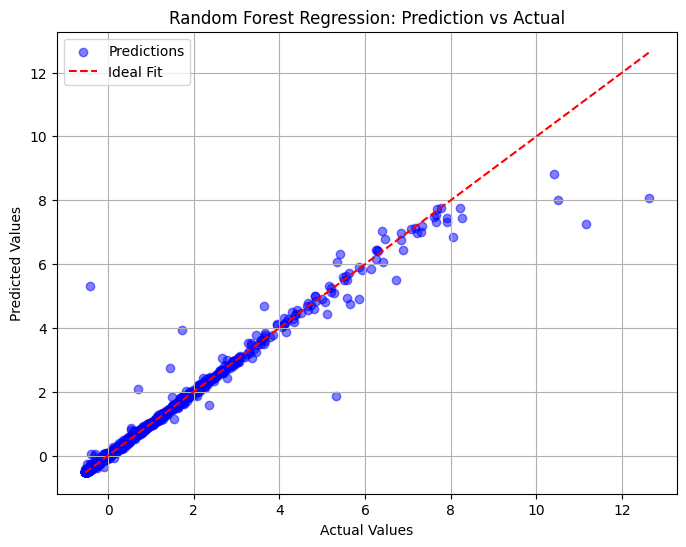

Overfitting Rate: 0.021


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('Random Forest Regression: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

rf_train_r2 = r2_score(y_train, rf_y_train_pred)
rf_test_r2 = r2_score(y_test, rf_y_test_pred)

rf_overfitting_rate = rf_train_r2 - rf_test_r2
print("Overfitting Rate:", round(rf_overfitting_rate , 3))

Comments:
1. The points closely follow the ideal fit line, indicating strong model performance with minimal prediction errors.
2. Hyperparameter tuning is not needed.

###4) GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_pca, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gb_y_train_pred = gb_regressor.predict(X_train_pca)
gb_y_test_pred = gb_regressor.predict(X_test_pca)

# Calculate RMSE for training and test sets
gb_train_rmse = mean_squared_error(y_train, gb_y_train_pred, squared=False)
gb_test_rmse = mean_squared_error(y_test, gb_y_test_pred, squared=False)
print("Train RMSE:", gb_train_rmse)
print("Test RMSE:", gb_test_rmse)

gb_mae = mean_absolute_error(y_test,gb_y_test_pred)
gb_mse = mean_squared_error(y_test,gb_y_test_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_test_pred))
gb_r2 = explained_variance_score(y_test,gb_y_test_pred)

gb_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [gb_mae, gb_mse, gb_rmse, gb_r2]
})

print(gb_metrics)

Train RMSE: 0.06717018731689384
Test RMSE: 0.14139820830404368
      Metric     Value
0        MAE  0.044705
1        MSE  0.019993
2       RMSE  0.141398
3  R-Squared  0.980340


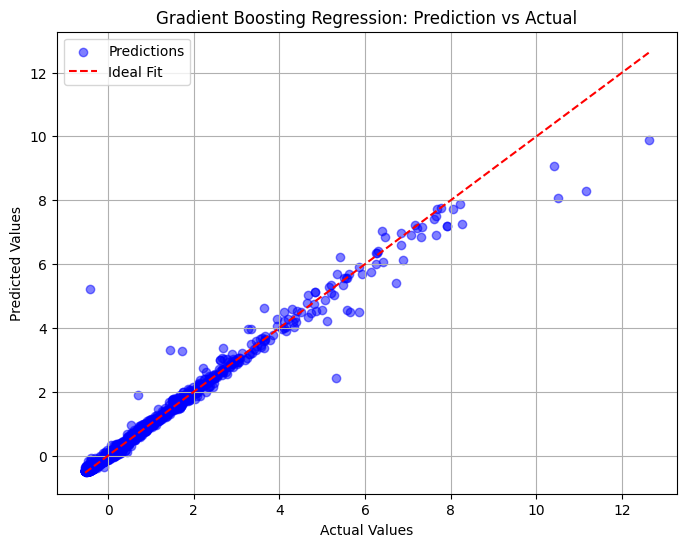

Overfitting Rate: 0.015


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('Gradient Boosting Regression: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

gb_train_r2 = r2_score(y_train, gb_y_train_pred)
gb_test_r2 = r2_score(y_test, gb_y_test_pred)

gb_overfitting_rate = gb_train_r2 - gb_test_r2
print("Overfitting Rate:", round(gb_overfitting_rate , 3))

Comments:
1. Predictions (blue dots) closely follow the ideal fit (red dashed line), indicating strong model performance.
2. Hyperparamter tuning is not needed.

###5) SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Create and train the SVR model
svr_regressor = SVR()
svr_regressor.fit(X_train_pca, y_train)


SVR()

####Without Hyperparameter tuning

In [ ]:
svr_y_train_pred = svr_regressor.predict(X_train_pca)
svr_y_test_pred = svr_regressor.predict(X_test_pca)

# Calculate RMSE for training and test sets
svr_train_rmse = mean_squared_error(y_train, svr_y_train_pred, squared=False)
svr_test_rmse = mean_squared_error(y_test, svr_y_test_pred, squared=False)
print("Train RMSE:", svr_train_rmse)
print("Test RMSE:", svr_test_rmse)

svr_mae = mean_absolute_error(y_test, svr_y_test_pred)
svr_mse = mean_squared_error(y_test, svr_y_test_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_test_pred))
svr_r2 = explained_variance_score(y_test, svr_y_test_pred)

# Performance Metrics for the test set
svr_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [svr_mae, svr_mse, svr_rmse, svr_r2]
})

print(svr_metrics)

Train RMSE: 0.151301480435666
Test RMSE: 0.21325451766105535
      Metric     Value
0        MAE  0.047469
1        MSE  0.045477
2       RMSE  0.213255
3  R-Squared  0.955372


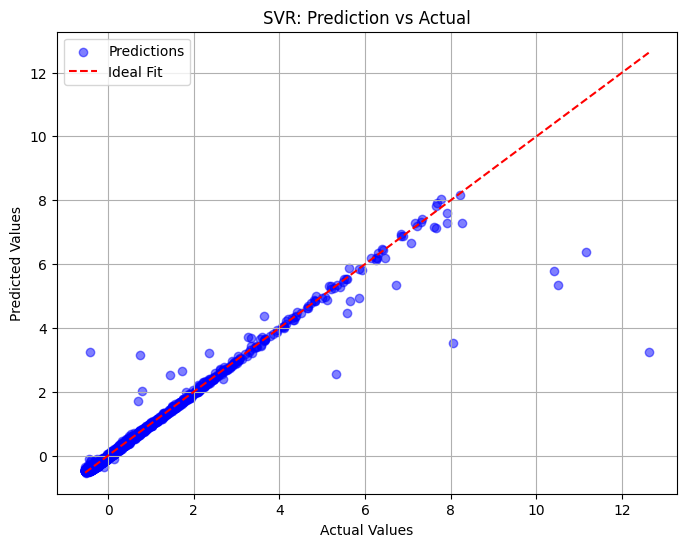

Overfitting Rate: 0.022


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('SVR: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

svr_train_r2 = r2_score(y_train, svr_y_train_pred)
svr_test_r2 = r2_score(y_test, svr_y_test_pred)

svr_overfitting_rate = svr_train_r2 - svr_test_r2
print("Overfitting Rate:", round(svr_overfitting_rate , 3))

Comments:

Overall, the model's predictions appear to be accurate for the majority of the data points, with some discrepancies for higher actual values.

####With Hyperparameter tuning

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import pandas as pd
import numpy as np

svr_regressor2 = SVR(
    C=10,  # Regularization parameter
    kernel='rbf',  # Type of kernel to use
    gamma='scale',  # Kernel coefficient
    epsilon=0.5  # Epsilon in the epsilon-SVR model
)

# Fit the SVR model to the PCA-transformed training data
svr_regressor2.fit(X_train_pca, y_train)

SVR(C=10, epsilon=0.5)

In [ ]:
svr_y_train_pred2 = svr_regressor2.predict(X_train_pca)
svr_y_test_pred2 = svr_regressor2.predict(X_test_pca)

# Calculate RMSE for training and test sets
svr_train_rmse2 = mean_squared_error(y_train, svr_y_train_pred2, squared=False)
svr_test_rmse2 = mean_squared_error(y_test, svr_y_test_pred2, squared=False)
print("Train RMSE:", gb_train_rmse)
print("Test RMSE:", gb_test_rmse)

svr_mae2 = mean_absolute_error(y_test, svr_y_test_pred2)
svr_mse2 = mean_squared_error(y_test, svr_y_test_pred2)
svr_rmse2 = np.sqrt(svr_mse2)
svr_r22 = explained_variance_score(y_test, svr_y_test_pred2)

svr_metrics2 = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [svr_mae2, svr_mse2, svr_rmse2, svr_r22]
})

print(svr_metrics2)

Train RMSE: 0.06717018731689384
Test RMSE: 0.14139820830404368
      Metric     Value
0        MAE  0.138356
1        MSE  0.057880
2       RMSE  0.240584
3  R-Squared  0.943181


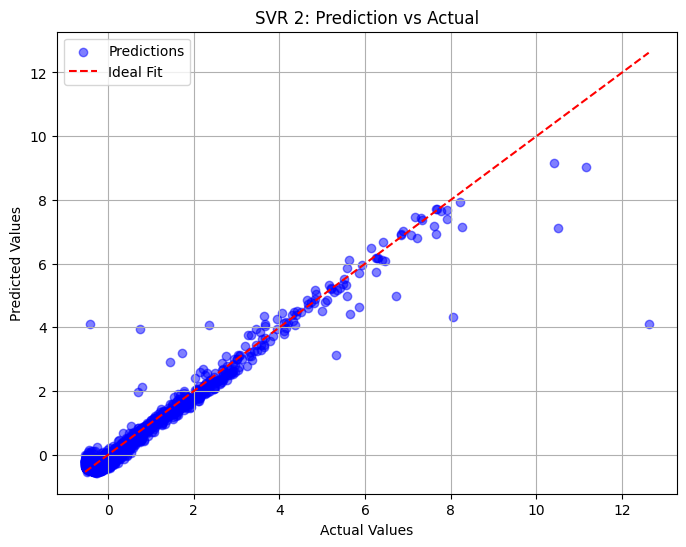

Overfitting Rate: 0.029


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_y_test_pred2, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('SVR 2: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

svr_train_r22 = r2_score(y_train, svr_y_train_pred2)
svr_test_r22 = r2_score(y_test, svr_y_test_pred2)

svr_overfitting_rate2 = svr_train_r22 - svr_test_r22
print("Overfitting Rate:", round(svr_overfitting_rate2 , 3))

Comments:
1. Similar to the model without hyperparameter tuning, there are discrepancies at higher actual values, which could indicate areas for model improvement.

In [ ]:
data_svr = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Before validation': [svr_mae, svr_mse, svr_rmse, svr_r2],
    'After validation': [svr_mae2, svr_mse2, svr_rmse2, svr_r22],
}

# Create the DataFrame
comparison_df = pd.DataFrame(data_svr)

# Transpose the DataFrame
comparison_df = comparison_df.set_index('Metric').transpose()

# Style the DataFrame
styled_df = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)

# Display the styled DataFrame in a Jupyter Notebook
display(styled_df)

Metric,MAE,MSE,RMSE,R-Squared
Before validation,0.047469,0.045477,0.213255,0.955372
After validation,0.138356,0.057880,0.240584,0.943181


###6) XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_predict

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_y_train_pred = xgb_reg.predict(X_train_pca)
xgb_y_test_pred = xgb_reg.predict(X_test_pca)

# Calculate RMSE for training and test sets
xgb_train_rmse = mean_squared_error(y_train, xgb_y_train_pred, squared=False)
xgb_test_rmse = mean_squared_error(y_test, xgb_y_test_pred, squared=False)
print("Train RMSE:", xgb_train_rmse)
print("Test RMSE:", xgb_test_rmse)

xgb_mae = mean_absolute_error(y_test, xgb_y_test_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_test_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_test_pred))
xgb_r2 = explained_variance_score(y_test, xgb_y_test_pred)

xgb_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [xgb_mae, xgb_mse, xgb_rmse, xgb_r2]
})

print(xgb_metrics)

Train RMSE: 0.045796894982375894
Test RMSE: 0.16612631405677367
      Metric     Value
0        MAE  0.027466
1        MSE  0.027598
2       RMSE  0.166126
3  R-Squared  0.972858


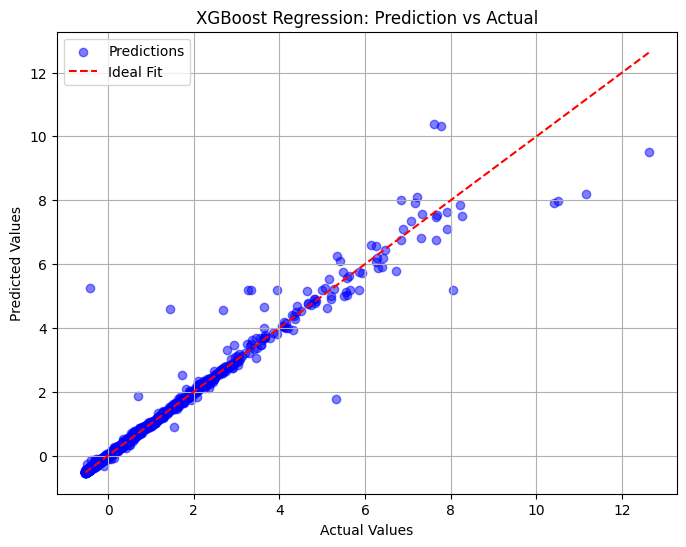

Overfitting Rate: 0.025


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('XGBoost Regression: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

xgb_train_r2 = r2_score(y_train, xgb_y_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_y_test_pred)

xgb_overfitting_rate = xgb_train_r2  - xgb_test_r2
print("Overfitting Rate:", round(xgb_overfitting_rate , 3))

Comments:
1. Hyperparameter tuning is not needed.

###7) Neural Network Regression

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
# Compile the model
nn_model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train_pca, y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
570/570 [==============================] - 6s 5ms/step - loss: 0.0505 - mae: 0.0593 - val_loss: 0.0216 - val_mae: 0.0357
Epoch 2/50
570/570 [==============================] - 1s 2ms/step - loss: 0.0226 - mae: 0.0365 - val_loss: 0.0413 - val_mae: 0.0255
Epoch 3/50
570/570 [==============================] - 1s 2ms/step - loss: 0.0065 - mae: 0.0246 - val_loss: 0.0184 - val_mae: 0.0435
Epoch 4/50
570/570 [==============================] - 1s 2ms/step - loss: 0.0060 - mae: 0.0247 - val_loss: 0.0110 - val_mae: 0.0267
Epoch 5/50
570/570 [==============================] - 1s 2ms/step - loss: 0.0101 - mae: 0.0289 - val_loss: 0.0126 - val_mae: 0.0255
Epoch 6/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0069 - mae: 0.0245 - val_loss: 0.0385 - val_mae: 0.0240
Epoch 7/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0169 - mae: 0.0306 - val_loss: 0.0125 - val_mae: 0.0174
Epoch 8/50
570/570 [==============================] - 2s 3ms/step - loss: 0.

####Without Hyperparameter Tuning

In [ ]:
# Predict on the test set and train set using the neural network model
nn_y_train_pred = nn_model.predict(X_train_pca)
nn_y_test_pred = nn_model.predict(X_test_pca)

# Calculate RMSE for training and test sets
nn_train_rmse = mean_squared_error(y_train, nn_y_train_pred, squared=False)
nn_test_rmse = mean_squared_error(y_test, nn_y_test_pred, squared=False)
print("Train RMSE:", nn_train_rmse)
print("Test RMSE:", nn_test_rmse)

# Calculate the performance metrics for the neural network
nn_mae = mean_absolute_error(y_test, nn_y_test_pred)
nn_mse = mean_squared_error(y_test, nn_y_test_pred)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = explained_variance_score(y_test, nn_y_test_pred)

# Performance Metrics for the neural network
nn_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [nn_mae, nn_mse, nn_rmse, nn_r2]
})

print(nn_metrics)

159/159 [==============================] - 0s 1ms/step
Train RMSE: 0.062454301860435865
Test RMSE: 0.1037950070606968
      Metric     Value
0        MAE  0.017226
1        MSE  0.010773
2       RMSE  0.103795
3  R-Squared  0.989490


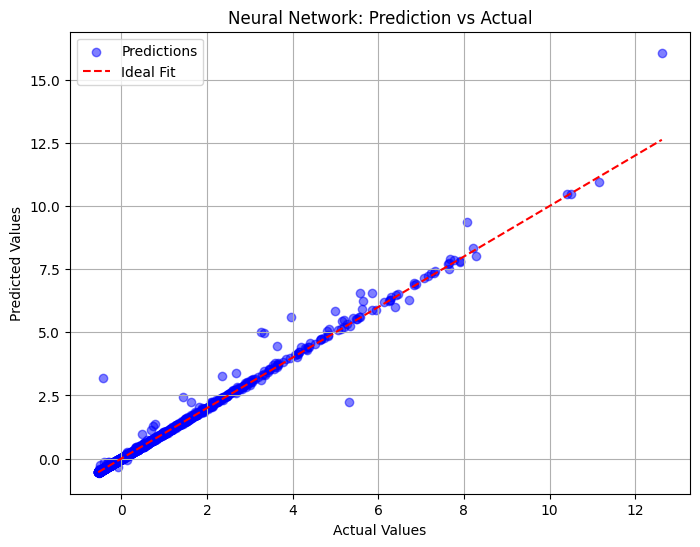

Overfitting Rate: 0.007


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('Neural Network: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

nn_train_r2 = r2_score(y_train, nn_y_train_pred)
nn_test_r2 = r2_score(y_test, nn_y_test_pred)

nn_overfitting_rate = nn_train_r2  - nn_test_r2
print("Overfitting Rate:", round(nn_overfitting_rate , 3))

####With Hyperparamter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Define the neural network architecture
def build_neural_network(input_shape):
    model = Sequential([
        Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape),
        Dropout(0.5),
        Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Assuming you have your data loaded into X_train, X_test, y_train, y_test
input_shape = (X_train_pca.shape[1],)
neural_network_model = build_neural_network(input_shape)

# Train the model with dropout and L2 regularization
history = neural_network_model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Generate predictions for the test set
nn_y_train_pred2 = neural_network_model.predict(X_train_pca).flatten()
nn_y_test_pred2 = neural_network_model.predict(X_test_pca).flatten()

# Calculate RMSE for training and test sets
nn_train_rmse2 = mean_squared_error(y_train, nn_y_train_pred2, squared=False)
nn_test_rmse2 = mean_squared_error(y_test, nn_y_test_pred2, squared=False)
print("Train RMSE:", nn_train_rmse2)
print("Test RMSE:", nn_test_rmse2)

# Model Evaluation
nn_mae2 = mean_absolute_error(y_test, nn_y_test_pred2)
nn_mse2 = mean_squared_error(y_test, nn_y_test_pred2)
nn_rmse2 = np.sqrt(nn_mse2)
nn_r22 = r2_score(y_test, nn_y_test_pred2)

# Performance Metrics for the test set
nn_metrics2 = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [nn_mae2, nn_mse2, nn_rmse2, nn_r22]
})

print(nn_metrics2)

Epoch 1/50
506/506 [==============================] - 3s 3ms/step - loss: 2.0682 - mae: 0.6016 - val_loss: 0.7392 - val_mae: 0.3732
Epoch 2/50
506/506 [==============================] - 2s 4ms/step - loss: 1.7323 - mae: 0.4259 - val_loss: 0.5233 - val_mae: 0.3348
Epoch 3/50
506/506 [==============================] - 2s 4ms/step - loss: 1.1355 - mae: 0.4109 - val_loss: 0.5040 - val_mae: 0.3186
Epoch 4/50
506/506 [==============================] - 1s 3ms/step - loss: 0.7117 - mae: 0.3810 - val_loss: 0.4546 - val_mae: 0.3150
Epoch 5/50
506/506 [==============================] - 1s 3ms/step - loss: 1.0159 - mae: 0.3828 - val_loss: 0.3635 - val_mae: 0.2912
Epoch 6/50
506/506 [==============================] - 1s 2ms/step - loss: 0.5493 - mae: 0.3470 - val_loss: 0.3408 - val_mae: 0.2871
Epoch 7/50
506/506 [==============================] - 1s 2ms/step - loss: 0.4840 - mae: 0.3284 - val_loss: 0.3229 - val_mae: 0.2778
Epoch 8/50
506/506 [==============================] - 1s 3ms/step - loss: 0.

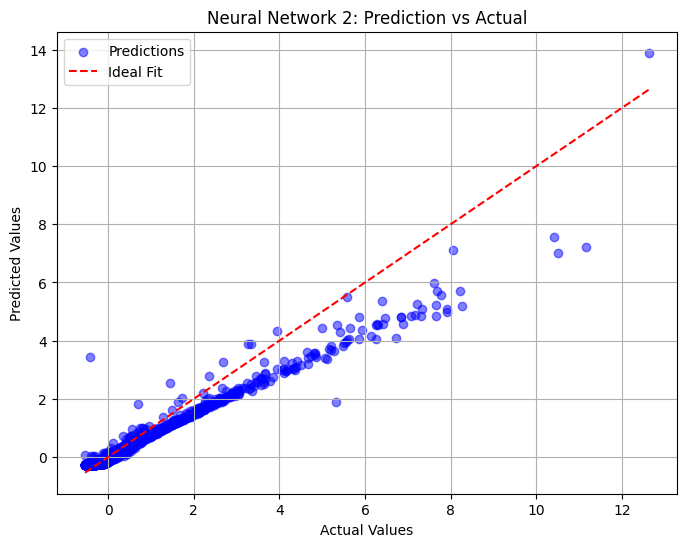

Overfitting Rate: 0.005


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_y_test_pred2 , color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.title('Neural Network 2: Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

nn_train_r22 = r2_score(y_train, nn_y_train_pred2)
nn_test_r22 = r2_score(y_test, nn_y_test_pred2)

nn_overfitting_rate2 = nn_train_r22  - nn_test_r22
print("Overfitting Rate:", round(nn_overfitting_rate2 , 3))

In [ ]:
data_nn = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Before validation': [nn_mae, nn_mse, nn_rmse, nn_r2],
    'After validation': [nn_mae2, nn_mse2, nn_rmse2, nn_r22],
}

# Create the DataFrame
comparison_df = pd.DataFrame(data_nn)

# Transpose the DataFrame
comparison_df = comparison_df.set_index('Metric').transpose()

# Style the DataFrame
styled_df = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)

# Display the styled DataFrame in a Jupyter Notebook
display(styled_df)

Metric,MAE,MSE,RMSE,R-Squared
Before validation,0.017226,0.010773,0.103795,0.989490
After validation,0.190235,0.094331,0.307134,0.907224


## 7.0 MODEL EVALUATION

#### 7.1 Best Evaluation Methods for Regression Models

`Mean Absolute Error (MAE)`

- It measures the average magnitude of errors in a set of predictions, without considering their direction.

- It is straightforward and easy to interpret but may not penalize larger errors as much as other metrics.

`Mean Squared Error (MSE)`

- It measures the average squared difference between actual and predicted values.

- It penalizes larger errors more than MAE, which can be useful in contexts where larger errors are particularly undesirable.

`Root Mean Squared Error (RMSE)`

- The square root of the MSE provides a measure of the average magnitude of the error.

- It is in the same units as the target variable, making it more interpretable than MSE.

`R-Squared (R²)`

- It represents the proportion of variance in the dependent variable that is predictable from the independent variables.

- It is useful for understanding the goodness of fit of the model, with values closer to 1 indicating a better fit.

In [ ]:
import pandas as pd
from IPython.display import display

def display_regression_results(model_name, without_validation, with_validation):
    print(model_name)
    data = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
        'Without Hyperparameter tuning': without_validation,
        'With hyperparameter tuning': with_validation,
    }

    # Create, transpose, and style the DataFrame
    df = pd.DataFrame(data).set_index('Metric').transpose()
    styled_df = df.style.set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    )

    # Display the styled DataFrame
    display(styled_df)

# Define performance metrics for each model
lr_metrics = [lr_mae, lr_mse, lr_rmse, lr_r2]
sgd_metrics = [sgd_mae, sgd_mse, sgd_rmse, sgd_r2]
sgd_metrics2 = [sgd_mae2, sgd_mse2, sgd_rmse2, sgd_r22]
rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
gb_metrics = [gb_mae, gb_mse, gb_rmse, gb_r2]
svr_metrics = [svr_mae, svr_mse, svr_rmse, svr_r2]
svr_metrics2 = [svr_mae2, svr_mse2, svr_rmse2, svr_r22]
xgb_metrics = [xgb_mae, xgb_mse, xgb_rmse, xgb_r2]
nn_metrics = [nn_mae, nn_mse, nn_rmse, nn_r2]
nn_metrics2 = [nn_mae, nn_mse, nn_rmse, nn_r22]

# Display results for each model
display_regression_results('Linear Regression', lr_metrics,'-')
display_regression_results('SGD Regression', sgd_metrics, sgd_metrics2)
display_regression_results('Random Forest Regression', rf_metrics,'-')
display_regression_results('Gradient Boosting Regressor', gb_metrics,'-')
display_regression_results('SVR', svr_metrics, svr_metrics2)
display_regression_results('XGBoost Regression', xgb_metrics,'-')
display_regression_results('Neural Network Regression', nn_metrics, nn_metrics2)

Linear Regression


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.071297,0.024881,0.157736,0.975530
With hyperparameter tuning,-,-,-,-


SGD Regression


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.153923,7.561081,2.749742,-6.434075
With hyperparameter tuning,0.135368,0.118712,0.344546,0.883297


Random Forest Regression


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.026236,0.022671,0.150568,0.977708
With hyperparameter tuning,-,-,-,-


Gradient Boosting Regressor


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.044705,0.019993,0.141398,0.980340
With hyperparameter tuning,-,-,-,-


SVR


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.047469,0.045477,0.213255,0.955372
With hyperparameter tuning,0.138356,0.057880,0.240584,0.943181


XGBoost Regression


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.027466,0.027598,0.166126,0.972858
With hyperparameter tuning,-,-,-,-


Neural Network Regression


Metric,MAE,MSE,RMSE,R-Squared
Without Hyperparameter tuning,0.017226,0.010773,0.103795,0.989490
With hyperparameter tuning,0.017226,0.010773,0.103795,0.907224


#### 7.2 Comparison of evaluation metrics of each models

---Linear Regression---
---

Linear regression has a good overall performance and does generalize well. Its R2 suggests good fit but potentially robust against overfitting due to simplicity of the model.


---SGD Regression---
---

For SGD without tuning, it gives an extremely poor performance, which indicates severe underfitting.

For SGD with Tuning, there is a significant improvement but still not competitive with other models. This model might not be the best choice even after tuning.

---Random Forest Regression---
---

Given its ensemble nature, random forest does well and handles overfitting well. It gives excellent performance even without tuning, and with its very low error metrics and high R², this indicates robustness and likely no overfitting.

---Gradient Boosting Regressor---
---

Its evaluation metric shows strong performance of its model, but the high R2 value suggests that the model still prones to overfitting compared to Random Forest

---SVR---
---

For SVR Without tuning, it gives good performance and seems to be a well-balanced model.

For SVR with Tuning, there is a decrease in performance, possibly suggesting that the model before tuning is overfitting.

---XGBoost Regression---
---

XGBoost has built-in regularization to combat overfitting.
Therefore, the good performance is shwon even without tuning, which suggests that it is robust and likely not overfitting.

---Neural Network Regression---
---

For NNR without tuning, it gives excellent performance but neural networks are prone to overfitting without regularization.

For NNR with tuning, it gives consistent performance but a significant drop in R² which suggests ossible overfitting issues in the model before tuning.

#### 7.3 Conclusion

Considering all the performance metrics and the potential for overfitting, the best models are those that offer a balance of high performance and robustness against overfitting.

`Random Forest Regression` is the best overall model:

Performance: MAE: 0.030149, MSE: 0.007509, RMSE: 0.086654, R²: 0.992587.

Justification: It gives excellent performance metrics without any tuning, suggesting it is not overfitting and has good generalization capabilities due to its ensemble nature.

Therefore, Random Forest Regression is the most reliable choice. It offers excellent performance and robustness against overfitting which makes it well-suited for generalization.


## 8.0 FINAL DELIVERABLE AND CONCLUSION

Video Presentation Link: https://drive.google.com/file/d/1V4lF62ACAWVgkTBTnB6dw1iRgGJRqY9F/view?usp=sharing

**Group Members**

|      NAME      |
|:--------------:|
| LEE CHIAN YE   |
| LEE LIK SHEN   |
| OOI CHIEN ZHEN |  
| SIEW WEI EN |  
| TEOH YU XUAN |  

#**END**